# E13 - Analyze class homeworks


Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [1]:
#pip install textblob

In [2]:
# Librerias
import pandas as pd
import numpy as np
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

#conda install -c conda-forge wordcloud
from wordcloud import WordCloud

In [3]:
# Data
data = pd.read_excel('DataSet/Consolidado_respuestas_escribir_v2.xlsx',index_col=0)
df = pd.DataFrame(data)

#### Limpieza y normalización de datos

In [4]:
# edad como entero
df['Edad'] = df['Edad'].replace(np.nan,0)
df['Edad'] = df['Edad'].astype(int)

In [5]:
# reemplazar nan
df = data.replace(np.nan,"No reporta")

In [6]:
# eliminar dígitos
digits = ['0','1','2','3','4','5','6','7','8','9']
cols = df.select_dtypes(include=[np.object]).columns
for digit in digits:
    df[cols] = df[cols].apply(lambda x: x.str.replace(digit, ''))

In [7]:
# eliminar caracteres especiales
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
cols = df.select_dtypes(include=[np.object]).columns
for char in spec_chars:
    df[cols] = df[cols].apply(lambda x: x.str.replace(char, ''))

In [8]:
# eliminar minúsculas
cols = df.select_dtypes(include=[np.object]).columns
df[cols] = df[cols].apply(lambda x: x.str.lower())

In [9]:
# eliminar tíldes
cols = df.select_dtypes(include=[np.object]).columns
df[cols] = df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [10]:
# creación categoría estudiantes con doble titulacion 
df['Carrera de pregrado'] = df['Carrera de pregrado'].replace("ingenieria indistrial, admon neg internacionales","doble titulacion")
df['Carrera de pregrado'] = df['Carrera de pregrado'].replace("ingenieria industrial y economia","doble titulacion")
df['Carrera de pregrado'] = df['Carrera de pregrado'].replace("biologia e ingenieria biomedica","doble titulacion")

In [11]:
# normalización variable carrera de pregrado
df['Carrera de pregrado'] = df['Carrera de pregrado'].replace("economista","economia")
df['Carrera de pregrado'] = df['Carrera de pregrado'].replace("ingeniera de sistemas","ingenieria de sistemas")
df['Carrera de pregrado'] = df['Carrera de pregrado'].replace("ing. electronica","ingenieria electronica")

In [12]:
# normalizacion variable sector en el que trabaja
df['Sector en el que trabaja'] = df['Sector en el que trabaja'].replace("data scientist - banca","financiero")
df['Sector en el que trabaja'] = df['Sector en el que trabaja'].replace("pensiones","financiero")
df['Sector en el que trabaja'] = df['Sector en el que trabaja'].replace("infraestructura detransporte","infraestructura de transporte")
df['Sector en el que trabaja'] = df['Sector en el que trabaja'].replace("consultoria  de negocios y tecnologia","consultoria de negocios y tecnologia")

In [13]:
df.head()

,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview
ID,,,,,,,,,,
1,m,matematicas,estudio de mercados,30,dentro de las diferentes aplicaciones que tien...,la principal diferencia entre las series de ti...,los arboles de decision son herramienta de mac...,al proponer un metodo para realizar una predic...,durante el desarrollo de soluciones dentro de ...,la empresa koreai se especializa en la impleme...
2,m,no reporta,no reporta,0,no reporta,una serie de tiempo se enfoca en un individio ...,no reporta,no reporta,un micro servicio es una parte de la arquitect...,no reporta
3,m,no reporta,no reporta,0,mercados energeticos tras la liberacion y desr...,los datos de series de tiempo son un conjunto ...,no reporta,los metodos de ensamble nos permiten mejorar e...,los microservicios defininen una nueva metodol...,no reporta
4,m,estadistica,financiero,28,las series de tiempo son una coleccion de obse...,los datos de series de tiempo son un conjunto ...,un arbol de decision es una especie de mapa en...,los metodos de ensamble de modelos o metodos c...,los microservicios son tanto un estilo de arqu...,la funcion de autocompletar las palabras en wh...
5,m,no reporta,no reporta,0,actualmente la empresa de mascotas laika quie...,un conjunto de datos de una serie de tiempo co...,no reporta,los modelos de ensamble consisten en mezclar l...,los microservicios son tanto un estilo de arqu...,no reporta


# Exercise 13.1

Analyze the writing patterns of each student

#### Descriptive Analysis

In [14]:
print('Edad:')
pd.cut(df['Edad'], [0, 28, 30, 34, 53], labels=['<28', '28-30', '30-34', '34-53']).value_counts()

Edad:


<28      8
34-53    7
28-30    7
30-34    5
Name: Edad, dtype: int64

In [15]:
print('Genero:')
df['Genero'].value_counts()

Genero:


m    28
f    10
Name: Genero, dtype: int64

In [16]:
print('Carrera de pregrado:')
df['Carrera de pregrado'].value_counts()

Carrera de pregrado:


no reporta                                         11
ingenieria industrial                               7
estadistica                                         6
ingenieria de sistemas                              3
economia                                            3
ingenieria electronica                              2
doble titulacion                                    2
ingenieria indistrial admon neg internacionales     1
ing electronica                                     1
matematicas                                         1
finanzas                                            1
Name: Carrera de pregrado, dtype: int64

In [17]:
print('Sector en el que trabaja:')
df['Sector en el que trabaja'].value_counts()

Sector en el que trabaja:


financiero                              11
no reporta                              11
fintech                                  2
consumo masivo                           2
consultoria de negocios y tecnologia     1
infraestructura de transporte            1
estudio de mercados                      1
cultura                                  1
operaciones                              1
salud                                    1
data scientist  banca                    1
publico                                  1
ingenieria de software                   1
educacion                                1
electrico y de comunicaciones            1
telecomunicaciones                       1
Name: Sector en el que trabaja, dtype: int64

#### Matrices of Token by Homework

In [18]:
#pip install nltk
#nltk.download('stopwords')

In [19]:
import nltk
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

In [20]:
# se agregan n-gramas al stopwords
spanish_stopwords.append("no reporta")
spanish_stopwords.append("xyz")

In [21]:
# create document-term matrices
X1 = df['E1 - Examples of Time Series Analysis']
X2 = df['E4 - Panel Data']
X3 = df['E6 - Decison Trees']
X4 = df['E8 - Ensemble Trees Overview']
X5 = df['E10 - REST-API']
X6 = df['E12 - Natural Language Processing Overview']

# use CountVectorizer to create document-term matrices from X
vect1 = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X1_dtm = vect1.fit_transform(X1)

vect2 = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X2_dtm = vect2.fit_transform(X2)

vect3 = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X3_dtm = vect3.fit_transform(X3)

vect4 = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X4_dtm = vect4.fit_transform(X4)

vect5 = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X5_dtm = vect5.fit_transform(X5)

vect6 = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X6_dtm = vect6.fit_transform(X6)

In [22]:
# rows are comments, columns are terms (aka "tokens" or "features")
print('Exercise ( Number of comments , Number of terms)')
print('E1',X1_dtm.shape)
print('E4',X2_dtm.shape)
print('E6',X3_dtm.shape)
print('E8',X4_dtm.shape)
print('E10',X5_dtm.shape)
print('E12',X6_dtm.shape)

Exercise ( Number of comments , Number of terms)
E1 (38, 1594)
E4 (38, 976)
E6 (38, 1444)
E8 (38, 1245)
E10 (38, 1676)
E12 (38, 1666)


In [23]:
print('Total terms E1',len(vect1.vocabulary_))
print('Word:Time')
print(vect1.vocabulary_)

Total terms E1 1594
Word:Time
{'dentro': 406, 'diferentes': 463, 'aplicaciones': 94, 'series': 1363, 'tiempo': 1443, 'vida': 1563, 'real': 1241, 'encuentran': 525, 'precio': 1136, 'cualquier': 347, 'activo': 15, 'largo': 828, 'gran': 702, 'importancia': 754, 'dado': 370, 'reflejan': 1273, 'general': 683, 'mercados': 920, 'medio': 909, 'bolsas': 161, 'valores': 1533, 'new': 997, 'york': 1592, 'tokio': 1452, 'mas': 880, 'localmente': 853, 'colombia': 249, 'peru': 1105, 'analisis': 71, 'relacionado': 1287, 'tipo': 1448, 'siempre': 1369, 'interes': 801, 'economico': 493, 'volumenes': 1583, 'dinero': 468, 'estan': 581, 'presentes': 1152, 'importantes': 756, 'mundo': 975, 'parte': 1064, 'medicina': 903, 'importante': 755, 'monitorear': 954, 'signos': 1372, 'pueden': 1226, 'ser': 1358, 'presion': 1153, 'arterial': 104, 'glucosa': 696, 'hormonas': 731, 'produce': 1183, 'sistema': 1380, 'endocrino': 527, 'saturacion': 1331, 'oxigeno': 1045, 'seguimiento': 1340, 'prediccion': 1141, 'permite': 10

In [24]:
print('Total terms E4',len(vect2.vocabulary_))
print('Word:Time')
print(vect2.vocabulary_)

Total terms E4 976
Word:Time
{'principal': 697, 'diferencia': 270, 'series': 818, 'tiempo': 874, 'datos': 223, 'panel': 640, 'analiza': 33, 'regularmente': 764, 'solo': 840, 'variable': 937, 'resultado': 784, 'intervalo': 501, 'definido': 231, 'lado': 513, 'dado': 217, 'observaciones': 610, 'mismos': 567, 'individuos': 483, 'estudio': 364, 'permite': 660, 'analizar': 35, 'forma': 414, 'mas': 535, 'detallada': 251, 'completa': 153, 'cambios': 97, 'nivel': 600, 'total': 889, 'estan': 348, 'desagregados': 240, 'puede': 726, 'eliminar': 307, 'sesgo': 819, 'trabajar': 894, 'agrupados': 22, 'ademas': 11, 'pueden': 727, 'incorporar': 473, 'caracteristicas': 104, 'inobservables': 494, 'efectos': 298, 'temporales': 865, 'forman': 415, 'parte': 645, 'heterogeneidad': 441, 'observable': 608, 'general': 424, 'caso': 107, 'objetivo': 607, 'dentro': 237, 'desventajas': 250, 'respecto': 782, 'analisis': 32, 'principalmente': 699, 'obtencion': 617, 'procesamiento': 702, 'informacion': 488, 'permanenci

In [25]:
print('Total terms E6',len(vect3.vocabulary_))
print('Word:Time')
print(vect3.vocabulary_)

Total terms E6 1444
Word:Time
{'arboles': 87, 'decision': 371, 'herramienta': 685, 'machine': 821, 'learning': 800, 'supervisado': 1305, 'permite': 985, 'partir': 974, 'diferentes': 432, 'decisiones': 372, 'nodos': 918, 'ir': 784, 'tomando': 1346, 'basadas': 125, 'variables': 1411, 'cuantitativas': 349, 'cualitativas': 346, 'llegar': 813, 'nodo': 917, 'final': 610, 'ser': 1249, 'tomada': 1344, 'dicha': 425, 'observacion': 937, 'dentro': 386, 'usos': 1382, 'encuentran': 486, 'problemas': 1073, 'clasificacion': 226, 'regresion': 1150, 'finalidad': 612, 'realizar': 1127, 'generar': 661, 'modelo': 879, 'clasificar': 231, 'dos': 459, 'mas': 834, 'respuestas': 1190, 'ejemplos': 473, 'comunes': 276, 'utilizando': 1395, 'informacion': 754, 'encuentra': 485, 'base': 130, 'datos': 363, 'bancos': 120, 'determinar': 417, 'retencion': 1196, 'clientes': 235, 'deferentes': 374, 'tipos': 1339, 'servicios': 1254, 'ofrecidos': 947, 'banco': 119, 'tarjetas': 1315, 'credito': 338, 'ejemplo': 472, 'caracte

In [26]:
print('Total terms E8',len(vect4.vocabulary_))
print('Word:Time')
print(vect4.vocabulary_)

Total terms E8 1245
Word:Time
{'proponer': 920, 'metodo': 710, 'realizar': 962, 'prediccion': 870, 'debe': 314, 'usar': 1181, 'base': 110, 'particion': 811, 'informacion': 614, 'casos': 164, 'pueden': 929, 'presentar': 882, 'problemas': 896, 'seleccion': 1040, 'muestra': 739, 'entrenamiento': 431, 'algoritmo': 36, 'adicionalmente': 14, 'si': 1057, 'consideran': 245, 'diferentes': 356, 'metodos': 712, 'mismo': 725, 'conjunto': 233, 'encontrar': 401, 'soluciones': 1086, 'problema': 895, 'intentado': 625, 'solucionar': 1085, 'evitar': 488, 'ambiguedad': 46, 'hace': 567, 'uso': 1183, 'teorema': 1134, 'dice': 349, 'cualquier': 295, 'combinacion': 191, 'modelos': 732, 'mejor': 696, 'clasificacion': 179, 'aleatoria': 30, 'dicha': 350, 'cualquiera': 296, 'evaluados': 481, 'forma': 523, 'individual': 607, 'asi': 83, 'diferente': 355, 'tipos': 1145, 'ensamblajes': 413, 'primero': 886, 'necesita': 749, 'generar': 550, 'aparte': 58, 'utilizando': 1197, 'inicial': 615, 'bagging': 103, 'bootstrap': 

In [27]:
print('Total terms E10',len(vect5.vocabulary_))
print('Word:Time')
print(vect5.vocabulary_)

Total terms E10 1676
Word:Time
{'desarrollo': 490, 'soluciones': 1515, 'dentro': 465, 'empresas': 618, 'encuentran': 630, 'varias': 1645, 'dificultades': 537, 'tratar': 1594, 'solventar': 1516, 'todas': 1572, 'posibles': 1251, 'necesidades': 1125, 'solo': 1511, 'sistema': 1500, 'servicio': 1476, 'tener': 1556, 'grandes': 838, 'paquete': 1191, 'cada': 198, 'momento': 1100, 'actualizar': 34, 'mejorar': 1058, 'alguna': 77, 'parte': 1197, 'especifica': 693, 'solucion': 1512, 'encuentra': 629, 'gran': 836, 'numero': 1144, 'validaciones': 1638, 'objetos': 1146, 'modificados': 1092, 'experiencia': 737, 'cliente': 243, 'desarrollador': 482, 'arquitectura': 131, 'micro': 1075, 'servicios': 1477, 'permite': 1219, 'medio': 1053, 'varios': 1647, 'llegar': 1003, 'misma': 1081, 'diferentes': 534, 'componentes': 291, 'componente': 290, 'desarrollada': 479, 'liberada': 981, 'escalada': 667, 'forma': 787, 'individual': 909, 'encargar': 623, 'proposito': 1314, 'especifico': 696, 'viviran': 1669, 'mismo'

In [28]:
print('Total terms E12',len(vect6.vocabulary_))
print('Word:Time')
print(vect6.vocabulary_)

Total terms E12 1666
Word:Time
{'empresa': 565, 'koreai': 908, 'especializa': 631, 'implementacion': 831, 'asistentes': 137, 'virtuales': 1646, 'diferentes': 503, 'sectores': 1409, 'bancos': 184, 'seguros': 1418, 'empresas': 566, 'sector': 1408, 'salud': 1402, 'retail': 1379, 'canales': 225, 'comunicacion': 334, 'medio': 991, 'chat': 263, 'asesor': 133, 'parte': 1163, 'estrategia': 645, 'mercadeo': 1001, 'asistente': 136, 'virtual': 1645, 'funciona': 736, 'pagina': 1150, 'web': 1661, 'muestra': 1050, 'capacidades': 230, 'tener': 1533, 'soluciones': 1479, 'adaptables': 23, 'cada': 219, 'necesidad': 1066, 'httpskoreaiconversationalaiwhatisavirtualassistant': 802, 'reporta': 1353, 'funcion': 735, 'autocompletar': 156, 'palabras': 1157, 'whatsapp': 1663, 'persona': 1188, 'escribiendo': 617, 'correos': 404, 'hotmail': 800, 'gpt': 755, 'openai': 1122, 'generative': 752, 'pretrained': 1244, 'transformer': 1578, 'inteligencia': 881, 'artificial': 127, 'codigo': 289, 'abierto': 1, 'creada': 416

#### Word Cloud 

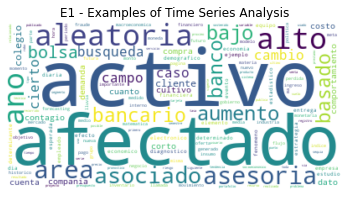

In [29]:
# features - "E1 - Examples of Time Series Analysis"
df1 = vect1.get_feature_names()

#Creating the text variable
text = " ".join(title for title in df1)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("E1 - Examples of Time Series Analysis")
plt.axis("off")
plt.show()

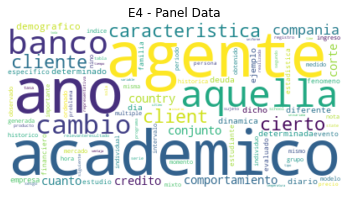

In [30]:
# features - "E4 - Panel Data"
df2 = vect2.get_feature_names()

#Creating the text variable
text = " ".join(title for title in df2)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("E4 - Panel Data")
plt.axis("off")
plt.show()

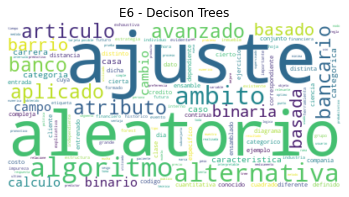

In [31]:
# features - "E6 - Decison Trees"
df3 = vect3.get_feature_names()

#Creating the text variable
text = " ".join(title for title in df3)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("E6 - Decison Trees")
plt.axis("off")
plt.show()

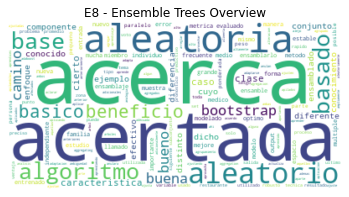

In [32]:
# features - "E8 - Ensemble Trees Overview"
df4 = vect4.get_feature_names()

#Creating the text variable
text = " ".join(title for title in df4)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("E8 - Ensemble Trees Overview")
plt.axis("off")
plt.show()

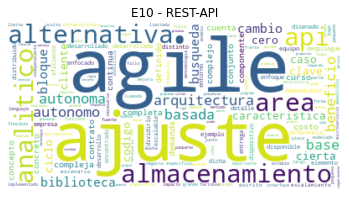

In [33]:
# features - "E10 - REST-API"
df5 = vect5.get_feature_names()

#Creating the text variable
text = " ".join(title for title in df5)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("E10 - REST-API")
plt.axis("off")
plt.show()

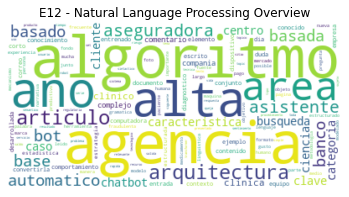

In [34]:
# features - "E12 - Natural Language Processing Overview"
df6 = vect6.get_feature_names()

#Creating the text variable
text = " ".join(title for title in df6)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.title("E12 - Natural Language Processing Overview")
plt.axis("off")
plt.show()

# Exercise 13.2

Create a classifier to predict the gender of each student



In [35]:
y1 = df.Genero
df['Genero'].unique()

array(['m', 'f'], dtype=object)

In [36]:
# model
X = (X1_dtm,X2_dtm,X3_dtm,X4_dtm,X5_dtm,X6_dtm)

for i in range(0,6):    
    nb = MultinomialNB()
    print('X'+str(i+1),pd.Series(cross_val_score(nb, X[i], y1, cv=10)).mean())

X1 0.35833333333333334
X2 0.7166666666666667
X3 0.6333333333333334
X4 0.6583333333333333
X5 0.7333333333333334
X6 0.4416666666666666


In [37]:
# best model and predict
Z = X5_dtm
nb.fit(Z,y1)
y_pred = nb.predict(Z)

print('f',np.count_nonzero(y_pred == 'f'))
print('m',np.count_nonzero(y_pred == 'm'))

f 9
m 29


In [40]:
# real
y1.array

print('f',np.count_nonzero(y1.array == 'f'))
print('m',np.count_nonzero(y1.array == 'm'))

f 10
m 28


# Exercise 13.3
Create a classifier to predict the industry in which each student works

In [ ]:
y2 = df['Sector en el que trabaja']
df['Sector en el que trabaja'].unique()

In [ ]:
# simple model y = f(Xi_dtm)
X = (X1_dtm,X2_dtm,X3_dtm,X4_dtm,X5_dtm,X6_dtm)

print('model','accuracy')
for i in range(0,6):
    nb = MultinomialNB()
    print('X'+str(i+1),pd.Series(cross_val_score(nb, X[i], y2, cv=10)).mean())

In [ ]:
# best model and predict
Z = X2_dtm
nb.fit(Z,y2)
y_pred = nb.predict(Z)

print('financiero',np.count_nonzero(y_pred == 'financiero'))
print('no reporta',np.count_nonzero(y_pred == 'no reporta'))
print('fintech',np.count_nonzero(y_pred == 'fintech'))
print('consumo masivo ',np.count_nonzero(y_pred == 'consumo masivo'))
print('electrico y de comunicaciones ',np.count_nonzero(y_pred == 'electrico y de comunicaciones'))
print('educacion',np.count_nonzero(y_pred == 'educacion'))
print('operaciones',np.count_nonzero(y_pred == 'operaciones'))
print('estudio de mercados',np.count_nonzero(y_pred == 'estudio de mercados'))
print('publico',np.count_nonzero(y_pred == 'publico'))
print('telecomunicaciones',np.count_nonzero(y_pred == 'telecomunicaciones'))
print('ingenieria de software',np.count_nonzero(y_pred == 'ingenieria de software'))
print('salud',np.count_nonzero(y_pred == 'salud'))
print('cultura',np.count_nonzero(y_pred == 'cultura'))
print('consultoria de negocios y tecnologia',np.count_nonzero(y_pred == 'consultoria de negocios y tecnologia'))
print('infraestructura de transporte',np.count_nonzero(y_pred == 'infraestructura de transporte'))

In [ ]:
# real
y.array

print('financiero',np.count_nonzero(y.array == 'financiero'))
print('no reporta',np.count_nonzero(y.array == 'no reporta'))
print('fintech',np.count_nonzero(y.array == 'fintech'))
print('consumo masivo ',np.count_nonzero(y.array == 'consumo masivo'))
print('electrico y de comunicaciones ',np.count_nonzero(y.array == 'electrico y de comunicaciones'))
print('educacion',np.count_nonzero(y.array == 'educacion'))
print('operaciones',np.count_nonzero(y.array == 'operaciones'))
print('estudio de mercados',np.count_nonzero(y.array == 'estudio de mercados'))
print('publico',np.count_nonzero(y.array == 'publico'))
print('telecomunicaciones',np.count_nonzero(y.array == 'telecomunicaciones'))
print('ingenieria de software',np.count_nonzero(y.array == 'ingenieria de software'))
print('salud',np.count_nonzero(y.array == 'salud'))
print('cultura',np.count_nonzero(y.array == 'cultura'))
print('consultoria de negocios y tecnologia',np.count_nonzero(y.array == 'consultoria de negocios y tecnologia'))
print('infraestructura de transporte',np.count_nonzero(y.array == 'infraestructura de transporte'))

In [85]:
prueba = df.iloc[0:,6:9]
prueba.head(3)

,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API
ID,,,
1,los arboles de decision son herramienta de mac...,al proponer un metodo para realizar una predic...,durante el desarrollo de soluciones dentro de ...
2,no reporta,no reporta,un micro servicio es una parte de la arquitect...
3,no reporta,los metodos de ensamble nos permiten mejorar e...,los microservicios defininen una nueva metodol...


In [93]:
XX = {}

for i in range(4,10):
    for j in range(4,10):
        XX[i,j] = df.iloc[0:,i:(j+1)]
#X3=X.iloc[:,0:1].values.tolist()+X.iloc[:,1:2].values.tolist()
#X3 = pd.Series((i[0] for i in X3))

In [282]:
YY = {}
#AAA = {}
#vect_ ={}
#AAA_dtm = {}

#vect = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))

for i in range(4,10):
    for j in range(4,10):
        YY[i,j] = df.iloc[0:,i:(j+1)]
        YY[i,j]['sum'] = YY[i,j].sum(axis=1)
        #ZZZ = YY[i,j]['sum']
        #AAA[i,j] = pd.Series((i for i in ZZZ))
        #pd.Series((i for i in ZZZ))
        #YY[i,j]['vect'] = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
        #YY[i,j]['dtm'] = YY[i,j]['vect'].fit_transform(YY[i,j]['sum'])
        
        #YYY = YY[i,j]['sum']
        #YY[i,j]['sum'] = pd.Series((k[0] for k in YY[i,j]['sum']))

In [293]:
#YY[4,9]['sum']
vect45 = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X45_dtm = vect45.fit_transform(YY[4,5]['sum'])
nb = MultinomialNB()
print('accuracy','4:5',pd.Series(cross_val_score(nb, X45_dtm, y1, cv=10)).mean())

accuracy 4:5 0.5666666666666667


In [296]:
#YY[4,9]['sum']
vect46 = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X46_dtm = vect46.fit_transform(YY[4,6]['sum'])
nb = MultinomialNB()
print('accuracy','4:6',pd.Series(cross_val_score(nb, X46_dtm, y1, cv=10)).mean())

accuracy 4:6 0.7166666666666667


In [297]:
#YY[4,9]['sum']
vect47 = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X47_dtm = vect47.fit_transform(YY[4,7]['sum'])
nb = MultinomialNB()
print('accuracy','4:7',pd.Series(cross_val_score(nb, X47_dtm, y1, cv=10)).mean())

accuracy 4:7 0.7083333333333333


In [298]:
#YY[4,9]['sum']
vect48 = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X48_dtm = vect48.fit_transform(YY[4,8]['sum'])
nb = MultinomialNB()
print('accuracy','4:8',pd.Series(cross_val_score(nb, X48_dtm, y1, cv=10)).mean())

accuracy 4:8 0.7583333333333334


In [258]:
AAA[4,9]

0     dentro de las diferentes aplicaciones que tien...
1     no reportauna serie de tiempo se enfoca en un ...
2     mercados energeticos tras la liberacion y desr...
3     las series de tiempo son una coleccion de obse...
4      actualmente la empresa de mascotas laika quie...
5     las series de tiempo desempenan un papel funda...
6      prediccion de precios de acciones\n analisis ...
7     precio de acciones en la bolsa sujeto a las tr...
8     pronostico del tiempo dado el comportamiento e...
9      comportamiento del precio del dolar usando an...
10    \tuna planta lleva el conteo de su produccion ...
11    el primer ejemplo corresponde al registro mens...
12     contactos call center el numero de contactos ...
13    ejemplo  cantidad de usuarios nuevos que se de...
14    los siguientes son tres ejemplos en los cuales...
15    \tpara anticipar el futuro de una empresa manu...
16    uno de las principales aplicaciones del analis...
17    los analisis de las series de tiempo son u

In [237]:
YY[4,5]['sum']

ID
1     dentro de las diferentes aplicaciones que tien...
2     no reportauna serie de tiempo se enfoca en un ...
3     mercados energeticos tras la liberacion y desr...
4     las series de tiempo son una coleccion de obse...
5      actualmente la empresa de mascotas laika quie...
6     las series de tiempo desempenan un papel funda...
7      prediccion de precios de acciones\n analisis ...
8     precio de acciones en la bolsa sujeto a las tr...
9     pronostico del tiempo dado el comportamiento e...
10     comportamiento del precio del dolar usando an...
11    \tuna planta lleva el conteo de su produccion ...
12    el primer ejemplo corresponde al registro mens...
13     contactos call center el numero de contactos ...
14    ejemplo  cantidad de usuarios nuevos que se de...
15    los siguientes son tres ejemplos en los cuales...
16    \tpara anticipar el futuro de una empresa manu...
17    uno de las principales aplicaciones del analis...
18    los analisis de las series de tiempo so

In [236]:
for i in range(4,10):
    for j in range(4,10):
        vect = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
        YY[i,j]['dtm'] = vect.fit_transform(pd.Series(YY[i,j]['sum']))


AttributeError: 'float' object has no attribute 'lower'

In [238]:
#pd.Series(YY[4,7]['sum'])
vect = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
YYY_dtm = vect.fit_transform(pd.Series(YY[4,7]['sum']))

In [245]:
ZZZ = YY[4,7]['sum']
AAA = pd.Series((i for i in ZZZ))

In [246]:
AAA

0     dentro de las diferentes aplicaciones que tien...
1     no reportauna serie de tiempo se enfoca en un ...
2     mercados energeticos tras la liberacion y desr...
3     las series de tiempo son una coleccion de obse...
4      actualmente la empresa de mascotas laika quie...
5     las series de tiempo desempenan un papel funda...
6      prediccion de precios de acciones\n analisis ...
7     precio de acciones en la bolsa sujeto a las tr...
8     pronostico del tiempo dado el comportamiento e...
9      comportamiento del precio del dolar usando an...
10    \tuna planta lleva el conteo de su produccion ...
11    el primer ejemplo corresponde al registro mens...
12     contactos call center el numero de contactos ...
13    ejemplo  cantidad de usuarios nuevos que se de...
14    los siguientes son tres ejemplos en los cuales...
15    \tpara anticipar el futuro de una empresa manu...
16    uno de las principales aplicaciones del analis...
17    los analisis de las series de tiempo son u

In [192]:
XX[4,6].head(3)

,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees
ID,,,
1,dentro de las diferentes aplicaciones que tien...,la principal diferencia entre las series de ti...,los arboles de decision son herramienta de mac...
2,no reporta,una serie de tiempo se enfoca en un individio ...,no reporta
3,mercados energeticos tras la liberacion y desr...,los datos de series de tiempo son un conjunto ...,no reporta


In [186]:
XX[4,5].iloc[0,0]

'dentro de las diferentes aplicaciones que tiene las series de tiempo en la vida real se encuentran como el precio de cualquier activo a lo largo de tiempo estas series son de gran importancia dado que se reflejan por lo general en las diferentes mercados por medio de bolsas de valores como son la de new york tokio o mas localmente como la de colombia o peru el analisis de relacionado con este tipo de series siempre ha tenido un interes economico dado los volumenes de dinero que estan presentes en los mercados mas importantes del mundo\npor otra parte en la medicina es importante monitorear algunos signos importantes como lo pueden ser la presion arterial la glucosa las diferentes hormonas que produce el sistema endocrino la saturacion de oxigeno entre otras el seguimiento y prediccion de estas series permite realizar diagnosticos tempranos de enfermedades silenciosas y graves como lo son los problemas cardiacos problemas de glucosa o problemas en el sistema endocrino \npor ultimo otro

In [187]:
XX[4,5].iloc[0,1]

'la principal diferencia entre las series de tiempo y los datos panel es que en la series de tiempo se analiza regularmente solo la variable resultado en el intervalo de tiempo definido por otro lado los datos panel dado que son observaciones de los mismos individuos de estudio lo cual permite analizar de forma mas detallada y completa los cambios a nivel total como los datos estan desagregados se puede eliminar el sesgo de trabajar con datos agrupados ademas de que los datos panel pueden incorporar caracteristicas inobservables de los individuos y los efectos temporales que forman parte de la heterogeneidad no observable y que permite analizar de forma mas general el caso de estudio objetivo dentro de las desventajas respecto a los analisis de series de tiempo son principalmente la obtencion y procesamiento de la informacion o la permanencia de los individuos dentro del panel en el intervalo de tiempo necesario'

In [193]:
zz = XX[4,6].sum(axis=1)

In [197]:
zz.iloc[37]

' como se comporta y se estima el producto interno bruto pib de una economia el producto interno bruto es segun los economistas la variable macroeconomica mas importante porque mide el valor agregado de los bienes y servicios producidos por un pais en un horizonte determinado de tiempo en este sentido el analisis de series de tiempo permite a los hacedores de la politica macroeconomica entender y comprender el comportamiento del pib con mayor profundidad y asi poder explicar la naturaleza de las recesiones o de los periodos de auge y en general de los ciclos economicos asi mismo proyectar o predecir hacia adelante su comportamiento puede convertirse en una herramienta clave para las definiciones que en materia de politica monetaria y fiscal deben tomar los gobiernos de turno\n\n como se comporta y se proyecta el valor del indice accionario y las acciones que lo componen un indice accionario se construye como una canasta de precios de un conjunto de acciones que mejor representan el tam

In [184]:
XX[4,5].sum(axis=1)

ID
1     dentro de las diferentes aplicaciones que tien...
2     no reportauna serie de tiempo se enfoca en un ...
3     mercados energeticos tras la liberacion y desr...
4     las series de tiempo son una coleccion de obse...
5      actualmente la empresa de mascotas laika quie...
6     las series de tiempo desempenan un papel funda...
7      prediccion de precios de acciones\n analisis ...
8     precio de acciones en la bolsa sujeto a las tr...
9     pronostico del tiempo dado el comportamiento e...
10     comportamiento del precio del dolar usando an...
11    \tuna planta lleva el conteo de su produccion ...
12    el primer ejemplo corresponde al registro mens...
13     contactos call center el numero de contactos ...
14    ejemplo  cantidad de usuarios nuevos que se de...
15    los siguientes son tres ejemplos en los cuales...
16    \tpara anticipar el futuro de una empresa manu...
17    uno de las principales aplicaciones del analis...
18    los analisis de las series de tiempo so

In [223]:
XXX1 = XX[4,7].iloc[:,0:1].values.tolist()
XXX2 = XX[4,7].iloc[:,1:2].values.tolist()
XXX3 = pd.Series(XXX1+XXX2)
#XXX3 = pd.Series((i[0] for i in XXX3))
XXX3

0     [dentro de las diferentes aplicaciones que tie...
1                                          [no reporta]
2     [mercados energeticos tras la liberacion y des...
3     [las series de tiempo son una coleccion de obs...
4     [ actualmente la empresa de mascotas laika qui...
                            ...                        
71    [panel de datos es una estructura de datos mul...
72    [la diferencia radica en que la serie de tiemp...
73    [la serie de tiempo maneja observaciones a lo ...
74    [la diferencia principal que se presenta entre...
75    [una serie de tiempo es un conjunto de datos d...
Length: 76, dtype: object

,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview
ID,,,,
1,dentro de las diferentes aplicaciones que tien...,la principal diferencia entre las series de ti...,los arboles de decision son herramienta de mac...,al proponer un metodo para realizar una predic...
2,no reporta,una serie de tiempo se enfoca en un individio ...,no reporta,no reporta
3,mercados energeticos tras la liberacion y desr...,los datos de series de tiempo son un conjunto ...,no reporta,los metodos de ensamble nos permiten mejorar e...


In [112]:
X12

ID
1     dentro de las diferentes aplicaciones que tien...
2                                  no reportano reporta
3     mercados energeticos tras la liberacion y desr...
4     las series de tiempo son una coleccion de obse...
5      actualmente la empresa de mascotas laika quie...
6     las series de tiempo desempenan un papel funda...
7      prediccion de precios de acciones\n analisis ...
8     precio de acciones en la bolsa sujeto a las tr...
9     pronostico del tiempo dado el comportamiento e...
10     comportamiento del precio del dolar usando an...
11    \tuna planta lleva el conteo de su produccion ...
12    el primer ejemplo corresponde al registro mens...
13     contactos call center el numero de contactos ...
14    ejemplo  cantidad de usuarios nuevos que se de...
15    los siguientes son tres ejemplos en los cuales...
16    \tpara anticipar el futuro de una empresa manu...
17    uno de las principales aplicaciones del analis...
18    los analisis de las series de tiempo so

## ejemplo 2 variables con 3-gramas

In [152]:
X12

ID
1     dentro de las diferentes aplicaciones que tien...
2                                  no reportano reporta
3     mercados energeticos tras la liberacion y desr...
4     las series de tiempo son una coleccion de obse...
5      actualmente la empresa de mascotas laika quie...
6     las series de tiempo desempenan un papel funda...
7      prediccion de precios de acciones\n analisis ...
8     precio de acciones en la bolsa sujeto a las tr...
9     pronostico del tiempo dado el comportamiento e...
10     comportamiento del precio del dolar usando an...
11    \tuna planta lleva el conteo de su produccion ...
12    el primer ejemplo corresponde al registro mens...
13     contactos call center el numero de contactos ...
14    ejemplo  cantidad de usuarios nuevos que se de...
15    los siguientes son tres ejemplos en los cuales...
16    \tpara anticipar el futuro de una empresa manu...
17    uno de las principales aplicaciones del analis...
18    los analisis de las series de tiempo so

In [169]:
df.columns

Index(['Genero', 'Carrera de pregrado', 'Sector en el que trabaja', 'Edad',
       'E1 - Examples of Time Series Analysis', 'E4 - Panel Data',
       'E6 - Decison Trees', 'E8 - Ensemble Trees Overview', 'E10 - REST-API',
       'E12 - Natural Language Processing Overview'],
      dtype='object')

In [174]:
#X = df.iloc[0:,4:6]
#X3=X.iloc[:,0:1].values.tolist()+X.iloc[:,1:2].values.tolist()
#X3 = pd.Series((i[0] for i in X3))

X12 = df['E1 - Examples of Time Series Analysis']+''+df['E4 - Panel Data']+''+df['E6 - Decison Trees']+''+df['E8 - Ensemble Trees Overview']+''+df['E10 - REST-API']+''+df['E12 - Natural Language Processing Overview']
#XXX3

vect = CountVectorizer(stop_words=spanish_stopwords,ngram_range=(1, 1))
X12_dtm = vect.fit_transform(X12)
vect.vocabulary_

{'dentro': 1426,
 'diferentes': 1586,
 'aplicaciones': 317,
 'series': 4473,
 'tiempo': 4777,
 'vida': 5065,
 'real': 4064,
 'encuentran': 1802,
 'precio': 3778,
 'cualquier': 1284,
 'activo': 61,
 'largo': 2886,
 'gran': 2436,
 'importancia': 2613,
 'dado': 1328,
 'reflejan': 4154,
 'general': 2381,
 'mercados': 3136,
 'medio': 3101,
 'bolsas': 578,
 'valores': 5001,
 'new': 3339,
 'york': 5144,
 'tokio': 4798,
 'mas': 3055,
 'localmente': 2980,
 'colombia': 870,
 'peru': 3663,
 'analisis': 260,
 'relacionado': 4185,
 'tipo': 4789,
 'siempre': 4490,
 'interes': 2783,
 'economico': 1701,
 'volumenes': 5103,
 'dinero': 1607,
 'estan': 2019,
 'presentes': 3836,
 'importantes': 2615,
 'mundo': 3282,
 'parte': 3564,
 'medicina': 3091,
 'importante': 2614,
 'monitorear': 3227,
 'signos': 4500,
 'pueden': 4003,
 'ser': 4467,
 'presion': 3837,
 'arterial': 384,
 'glucosa': 2416,
 'hormonas': 2528,
 'produce': 3896,
 'sistema': 4536,
 'endocrino': 1808,
 'saturacion': 4384,
 'oxigeno': 3522,
 

In [175]:
print('accuracy')
nb = MultinomialNB()
pd.Series(cross_val_score(nb, X12_dtm, y1, cv=10)).mean()

accuracy


0.7333333333333334

In [173]:
# best model and predict
Z = X12_dtm
nb.fit(Z,y1)
y_pred = nb.predict(Z)
print('predict')
print('f',np.count_nonzero(y_pred == 'f'))
print('m',np.count_nonzero(y_pred == 'm'))

# real
y1.array
print('')
print('real')
print('f',np.count_nonzero(y1.array == 'f'))
print('m',np.count_nonzero(y1.array == 'm'))

predict
f 10
m 28

real
f 10
m 28
